In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from iminuit import Minuit
from scipy import stats
import math 
import sympy as sp
from IPython.core.display import Latex
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [3]:
sys.path.append('../External_Functions')
from ExternalFunctions import Chi2Regression, nice_string_output
from ExternalFunctions import add_text_to_ax 

In [4]:
plt.style.use('classic')

In [5]:
#1.1 
P_18 = (7/16)**18*(9/16)**7*(math.factorial(25)/(math.factorial(18)*math.factorial(7))) 
P_18

0.002953499094615584

In [6]:
#At least 18 grey marbles 
#Simply use the binomial with survival function
print(stats.binom.sf(17,25,7/16))


0.004039599792444158


In [7]:
#1.2 simply the last calculation
-500/np.log(0.04)

155.33373363990296

In [8]:
#1.3 
#Probability of getting 9478 with average being 241089/24, poisson distribution
stats.poisson.pmf(9478,241089/24)

3.303684833404085e-10

In [9]:
(241089/24 - 9478)/np.sqrt(241089/24 - 9478)

23.81963475790508

In [10]:
stats.poisson.cdf(9478,241089/24)

5.690767314059274e-09

In [11]:
#1.4 
0.97**20

0.543794342926747

In [12]:
stats.binom.cdf(100, 4000, 0.03) 

0.03263364413665202

# 2
### 2.1

In [13]:
def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [14]:
#2.1
z1, z2, x, y = sp.symbols('z1 z2 x y')
dz1, dz2, dx, dy = sp.symbols('sigma_z1 sigma_z2 sigma_x sigma_y')

z1 = x/y 
z2 = sp.cos(x)*x/y

dz1 = sp.sqrt((z1.diff(x)*dx)**2 + (z1.diff(y)*dy)**2)
dz2 = sp.sqrt((z2.diff(x)*dx)**2 + (z2.diff(y)*dy)**2)

fz1 = sp.lambdify((x,y), z1)
fz2 = sp.lambdify((x,y), z2)
fdz1 = sp.lambdify((x,y,dx,dy), dz1)
fdz2 = sp.lambdify((x,y,dx,dy), dz2)

vx = 1.92 
vdx = 0.39

vy = 3.1 
vdy = 1.3

vz1 = fz1(vx,vy)
vz2 = fz2(vx,vy)
vdz1 = fdz1(vx,vy,vdx,vdy)
vdz2 = fdz2(vx,vy,vdx,vdy)

lprint(sp.latex(sp.Eq(sp.symbols('z_1'), z1)))
lprint(sp.latex(sp.Eq(sp.symbols('z_2'), z2)))
lprint(sp.latex(sp.Eq(sp.symbols('\sigma_{z_1}'), dz1)))
lprint(sp.latex(sp.Eq(sp.symbols('\sigma_{z_2}'), dz2)))

print('z1 = ', vz1, ' +/- ', vdz1)
print('z2 = ', vz2, ' +/- ', vdz2)


#z1 now with correlation = 0.95
cor = sp.symbols('rho')
dz1_cor = sp.sqrt((z1.diff(x)*dx)**2 + (z1.diff(y)*dy)**2 + 2*cor*z1.diff(x)*z1.diff(y)*dx*dy)
vcor = 0.95

fdz1_cor = sp.lambdify((x,y,dx,dy,cor), dz1_cor)
vdz1_cor = fdz1_cor(vx,vy,vdx,vdy,vcor)
print('z1 = ', vz1, ' +/- ', vdz1_cor, ' with correlation = ', vcor)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

z1 =  0.6193548387096773  +/-  0.2885942648095234
z2 =  -0.21191204200313693  +/-  0.2842622855511739
z1 =  0.6193548387096773  +/-  0.14561226982042794  with correlation =  0.95


In [15]:
#Find the size of each term in the variance of z2, uncorrelated

Vz2_x = (z2.diff(x)*dx)**2
Vz1_y = (z2.diff(y)*dy)**2

fVz2_x = sp.lambdify((x,y,dx,dy), Vz2_x)
fVz2_y = sp.lambdify((x,y,dx,dy), Vz1_y)

vVz2_x = fVz2_x(vx,vy,vdx,vdy)
vVz2_y = fVz2_y(vx,vy,vdx,vdy)

print('Vz2_x = ', vVz2_x)
print('Vz2_y = ', vVz2_y)


Vz2_x =  0.07290782056714784
Vz2_y =  0.00789722641962928


### 2.2

In [16]:
#2.2
D = np.array([3.7, -1.2, -0.2, 0.7, 0.8])
P = np.array([1.5, -1, -0.7, 0.5, 0.1])

#Estimate the mean, standard deviation and uncertainty on the mean for D
print('Mean of D = ', np.mean(D))
print('Standard deviation of D = ', np.std(D, ddof=1))
print('Uncertainty on the mean of D = ', np.std(D, ddof = 1)/np.sqrt(len(D)))


Mean of D =  0.76
Standard deviation of D =  1.8311198759229284
Uncertainty on the mean of D =  0.8189017035029296


In [17]:
#What is the probability that D is larger than P
print('Probability that D is larger than P = ', stats.ttest_ind(D,P, equal_var=False , axis= 0, alternative = 'greater'))



Probability that D is larger than P =  Ttest_indResult(statistic=0.7294558717391544, pvalue=0.2462243274152182)


# 3

In [18]:
#Start by defining the theoretical function
def dfunc(x, a, C):
    return C*x**a*np.sin(np.pi*x)

In [19]:
#We want to create 20000 point in accordance to the theoretical function using acceptance-rejection
r = np.random
r.seed(42)

#We set the boundaries to be a 1x1 square and C = 1
N_tries = 0
N_points = 20000
points = np.zeros(N_points)
for i in range(N_points):
    while True:
        x = r.uniform(0,1)
        y = r.uniform(0,1)
        N_tries += 1
        if y < dfunc(x, 3, 1):
            break
    points[i] = x

eff = N_points/N_tries
print('Efficiency = ', eff, '+/-', np.sqrt(eff*(1 - eff)/N_tries))
print( 'C = ', 1/eff, ' +/- ', np.sqrt(eff*(1 - eff)/N_tries)/eff**2)

Efficiency =  0.1252661906551422 +/- 0.0008284319297286807
C =  7.982999999999999  +/-  0.052794549434577044


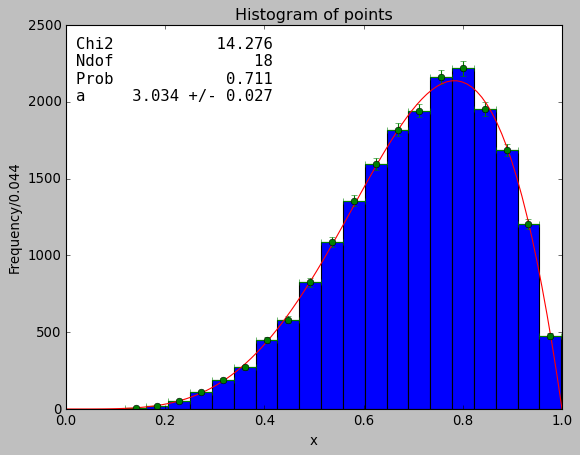

In [20]:
#Plot a histogram of the points and a fit of the theoretical function
counts, binedges = np.histogram(points, bins=20)
bincenters = 0.5*(binedges[1:] + binedges[:-1])
binwidth = binedges[1] - binedges[0]
counts_err = np.sqrt(counts)

chi2 = Chi2Regression(dfunc, bincenters, counts, counts_err)
minuit = Minuit(chi2, a=3, C=100)
minuit.migrad()

fig, ax = plt.subplots()
ax.hist(points, bins=20)
ax.errorbar(bincenters, counts, yerr=np.sqrt(counts), xerr = (bincenters[1]-bincenters[0])/2, fmt='o')
x_fit = np.linspace(0,1,100)
ax.plot(x_fit, dfunc(x_fit, *minuit.values[:]), 'r')
ax.set(xlabel = 'x', ylabel = f'Frequency/{binwidth:.3f}', title = 'Histogram of points');

chi2_val = minuit.fval
ndof = len(counts) - len(minuit.values[:])
chi2_prob = stats.chi2.sf(chi2_val, ndof)

# Include fit results in the plot:
d = {'Chi2': chi2_val,
     'Ndof': ndof,
     'Prob': chi2_prob,
     'a': [minuit.values['a'], minuit.errors['a']]
    }


text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax, fontsize=14);

fig.savefig('3_histogram.png')

In [21]:
relative_error = []
N_step = np.arange(100, N_points+1, 50)
for i in N_step:
    counts, binedges = np.histogram(points[:i], bins=30)
    bincenters = 0.5*(binedges[1:] + binedges[:-1])
    counts, bincenters = counts[counts>0], bincenters[counts>0]
    counts_err = np.sqrt(counts)
    chi2 = Chi2Regression(dfunc, bincenters, counts, counts_err)
    minuit = Minuit(chi2, a=3, C=1000)
    minuit.migrad() 
    relative_error.append(minuit.errors['a']/minuit.values['a'])
    r.shuffle(points)
relative_error = np.array(relative_error)

In [22]:
def powerlaw(x, a, b, c):
    return a*x**b + c

The relative error crosses 0.01 at 15818 points
0.00891122841861572


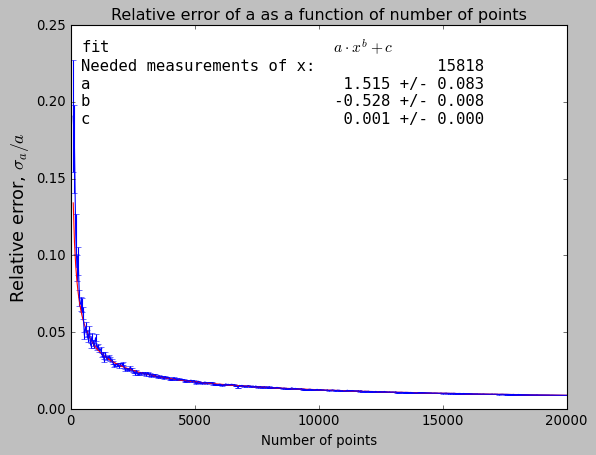

In [23]:
chi2_rel = Chi2Regression(powerlaw, N_step, relative_error, relative_error**2)
minuit_rel = Minuit(chi2_rel, a=1, b=-0.5, c = 0)
minuit_rel.migrad();

fig, ax = plt.subplots()
ax.errorbar(N_step, relative_error, yerr = relative_error**2)
ax.plot(N_step, powerlaw(N_step, *minuit_rel.values[:]), 'r')
ax.set(xlabel = 'Number of points', title = 'Relative error of a as a function of number of points')
ax.set_ylabel(r'Relative error, $\sigma_a /a$', fontsize=16)

chi2_val = minuit_rel.fval
ndof = len(N_step) - len(minuit_rel.values[:])
chi2_prob = stats.chi2.sf(chi2_val, ndof)



step_cross = ((0.01 - minuit_rel.values['c'])/minuit_rel.values['a'])**(1/minuit_rel.values['b'])

# Include fit results in the plot:
d = {'fit':  r'$a\cdot x^b + c$',
    'Needed measurements of x:': round(step_cross),
    'a': [minuit_rel.values['a'], minuit_rel.errors['a']],
    'b': [minuit_rel.values['b'], minuit_rel.errors['b']],
    'c': [minuit_rel.values['c'], minuit_rel.errors['c']],
    }


text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax, fontsize=14);

print(f'The relative error crosses 0.01 at {step_cross:.0f} points')
print(relative_error[-1])

fig.savefig('3_relative_error.png')

# 4

### 4.1

In [24]:
#4
dataframe = pd.read_csv('data_GripStrength.csv', header=0, index_col=None)
domhand, dom_grip, ndom_grip = dataframe.values.T

#From the sample which fraction is right handed (domhand = 1)
print('Fraction of right handed = ', np.sum(domhand)/len(domhand))
print('with uncertainty = ', np.sqrt(np.sum(domhand))/len(domhand))

#what is the mean and standard deviation of the grip strength of the dominant hand and non dominant hand

mean_dom = np.mean(dom_grip)
std_dom = np.std(dom_grip, ddof = 1)
print('Mean of dominant hand = ', mean_dom, 'pm', std_dom/np.sqrt(len(dom_grip)))
print('Standard deviation of dominant hand = ', std_dom)

mean_ndom = np.mean(ndom_grip)
std_ndom = np.std(ndom_grip, ddof = 1)
print('Mean of non dominant hand = ', mean_ndom, 'pm', std_ndom/np.sqrt(len(dom_grip)))
print('Standard deviation of non dominant hand = ', std_ndom)

#Are the means compatible with each other 
#Here we assume gaussian distribution and use two-sample test
z_test = (mean_dom - mean_ndom)/np.sqrt(std_dom**2/len(dom_grip) + std_ndom**2/len(ndom_grip))
#p-values for z_test
p_value = stats.norm.sf(abs(z_test))*2
print('Are the means compatible with each other = ', p_value, 'with z_test = ', z_test)

#here using t-test 
print('Are the means compatible with each other = ', stats.ttest_ind(dom_grip ,ndom_grip, equal_var=False , axis= 0, alternative = 'two-sided'))


diff = dom_grip - ndom_grip
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof = 1)
print('Mean of difference = ', mean_diff, 'pm', std_diff/np.sqrt(len(diff)))
print('Standard deviation of difference = ', std_diff)

#are the differences compatible with zero
z_test = (mean_diff)/np.sqrt(std_diff**2/len(diff))
#p-values for z_test
p_value = stats.norm.sf(abs(z_test))*2
print('Are the differences compatible with zero = ', p_value, 'with z_test = ', z_test)

#here using t-test
print('Are the differences compatible with zero = ', stats.ttest_1samp(diff, 0, axis= 0, alternative = 'two-sided'))


Fraction of right handed =  0.8095238095238095
with uncertainty =  0.09816918156232525
Mean of dominant hand =  444.93095238095236 pm 15.821743836109317
Standard deviation of dominant hand =  145.00867751034386
Mean of non dominant hand =  418.48178571428565 pm 15.0807814679255
Standard deviation of non dominant hand =  138.21764523171169
Are the means compatible with each other =  0.22625447022608625 with z_test =  1.2100636494909534
Are the means compatible with each other =  Ttest_indResult(statistic=1.2100636494909534, pvalue=0.2279787070360244)
Mean of difference =  26.449166666666674 pm 3.186952388285088
Standard deviation of difference =  29.20890111107342
Are the differences compatible with zero =  1.0481163267560101e-16 with z_test =  8.299203578908527
Are the differences compatible with zero =  Ttest_1sampResult(statistic=8.299203578908527, pvalue=1.6469976908961062e-12)


### 4.2

In [25]:

#define gaussian function
def gaussian(x, mu, sig):
    return np.exp(-(x - mu)**2 / (2 * sig**2))

def gaussian2(x, mu, sig, N):
    return N*gaussian(x, mu, sig)

#define double gaussian function
def double_gaussian(x, mu1, sig1, mu2, sig2, N, f):
    return N*(f*gaussian(x, mu1, sig1) + (1-f)*gaussian(x, mu2, sig2))

<ValueView mu=42.76672721975874 sig=9.64701695564504 N=132.4985298315422>


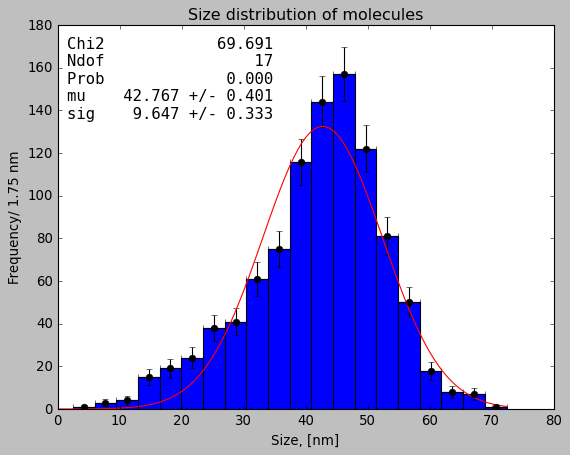

In [26]:
#4.2
dataframe = pd.read_csv('data_MoleculeTypes.csv', header=0, index_col=None)
size, intensity = dataframe.values.T

size_count, binedges = np.histogram(size, bins = 20)
bincenters = 0.5*(binedges[1:]+binedges[:-1])

#fit gaussian
chi2fit = Chi2Regression(gaussian2, bincenters, size_count, np.sqrt(size_count))
minuit = Minuit(chi2fit, mu = 0, sig = 1, N = 1)
minuit.migrad();
print(minuit.values)


binwidth = (binedges[1]-binedges[0])/2

#plot size in histogram
fig, ax = plt.subplots()
ax.hist(size, bins = 20)
ax.errorbar(bincenters, size_count, xerr = binwidth, yerr = np.sqrt(size_count), fmt = 'o', color = 'black')
ax.plot(np.linspace(0, np.max(binedges), 100), gaussian2(np.linspace(0, np.max(binedges), 100), *minuit.values[:]), color = 'red')
ax.set(xlabel = 'Size, [nm]', ylabel = f'Frequency/ {binwidth:.2f} nm', title = 'Size distribution of molecules')


chi2_val = minuit.fval
ndof = len(size_count) - len(minuit.values[:])
chi2_prob = stats.chi2.sf(chi2_val, ndof)

# Include fit results in the plot:
d = {'Chi2': chi2_val,
     'Ndof': ndof,
     'Prob': chi2_prob,
        'mu': [minuit.values['mu'], minuit.errors['mu']],
        'sig': [minuit.values['sig'], minuit.errors['sig']],
    }


text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax, fontsize=14);
fig.savefig('4_2_gauss.png')

<ValueView mu=44.543124826307604 sig=8.010181555303735 N=124.97499942458461>


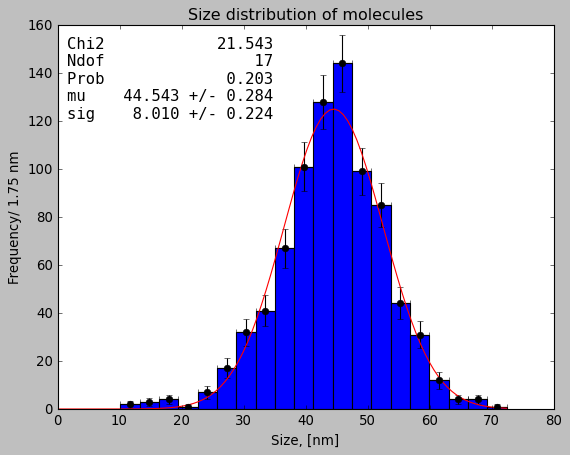

In [27]:
size_count2, binedges2 = np.histogram(size[intensity> 0.5], bins = 20)
bincenters2 = 0.5*(binedges2[1:]+binedges2[:-1])

#fit gaussian
chi2fit = Chi2Regression(gaussian2, bincenters2, size_count2, np.sqrt(size_count2))
minuit = Minuit(chi2fit, mu = 50, sig = 1, N = 100)
minuit.migrad();
print(minuit.values)


binwidth2 = (binedges2[1]-binedges2[0])/2

#plot size in histogram
fig, ax = plt.subplots()
ax.hist(size[intensity > 0.5], bins = 20)
ax.errorbar(bincenters2, size_count2, xerr = binwidth2, yerr = np.sqrt(size_count2), fmt = 'o', color = 'black')
ax.plot(np.linspace(0, np.max(binedges2), 100), gaussian2(np.linspace(0, np.max(binedges2), 100), *minuit.values[:]), color = 'red')
ax.set(xlabel = 'Size, [nm]', ylabel = f'Frequency/ {binwidth:.2f} nm', title = 'Size distribution of molecules')


chi2_val2 = minuit.fval
ndof2 = len(size_count) - len(minuit.values[:])
chi2_prob2 = stats.chi2.sf(chi2_val2, ndof2)

# Include fit results in the plot:
d = {'Chi2': chi2_val2,
     'Ndof': ndof2,
     'Prob': chi2_prob2,
        'mu': [minuit.values['mu'],minuit.errors['mu']],
        'sig': [minuit.values['sig'], minuit.errors['sig']],
    }


text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax, fontsize=14);
fig.savefig('4_2_gauss_int.png')

<ValueView mu1=45.23935660049911 sig1=7.594327738235221 mu2=26.076970538660454 sig2=8.112884420117267 N=177.43891069224745 f=0.8308108674006203>


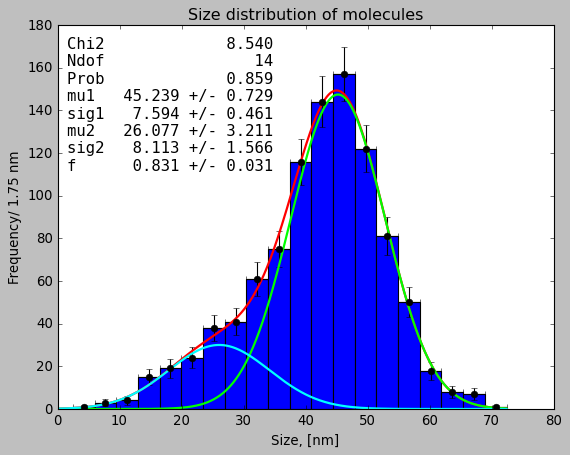

In [28]:
#Now fit double gaussian
chi2fit = Chi2Regression(double_gaussian, bincenters, size_count, np.sqrt(size_count))
minuit = Minuit(chi2fit, mu1 = 50, sig1 = 10, mu2 = 20, sig2 = 10, N = 100, f = 0.5)
minuit.migrad()
print(minuit.values)


x_fit = np.linspace(0, np.max(binedges), 1000)
double_gauss_fit = double_gaussian(x_fit, *minuit.values[:])
gauss_fit1 = gaussian2(x_fit, *minuit.values['mu1', 'sig1'], minuit.values['N']*(minuit.values['f']))
gauss_fit2 = gaussian2(x_fit, *minuit.values['mu2', 'sig2'], minuit.values['N']*(1-minuit.values['f']))

#plot size in histogram
fig, ax = plt.subplots()
ax.hist(size, bins = 20)
ax.errorbar(bincenters, size_count, xerr = binwidth, yerr = np.sqrt(size_count), fmt = 'o', color = 'black')
ax.plot(x_fit, double_gauss_fit, color = 'red', linewidth = 2)
ax.plot(x_fit, gauss_fit1, color = 'lime', linewidth = 2)
ax.plot(x_fit, gauss_fit2, color = 'cyan', linewidth = 2)
ax.set(xlabel = 'Size, [nm]', ylabel = f'Frequency/ {binwidth:.2f} nm', title = 'Size distribution of molecules')

chi2_val2 = minuit.fval
ndof2 = len(size_count) - len(minuit.values[:])
chi2_prob2 = stats.chi2.sf(chi2_val2, ndof2)

# Include fit results in the plot:
d = {'Chi2': chi2_val2,
     'Ndof': ndof2,
     'Prob': chi2_prob2,
        'mu1': [minuit.values['mu1'], minuit.errors['mu1']],
        'sig1': [minuit.values['sig1'], minuit.errors['sig1']],
        'mu2': [minuit.values['mu2'], minuit.errors['mu2']],
        'sig2': [minuit.values['sig2'], minuit.errors['sig2']],
        'f': [minuit.values['f'], minuit.errors['f']],
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax, fontsize=14);
fig.savefig('4_2_double_gauss.png')

[28.70940541] nm


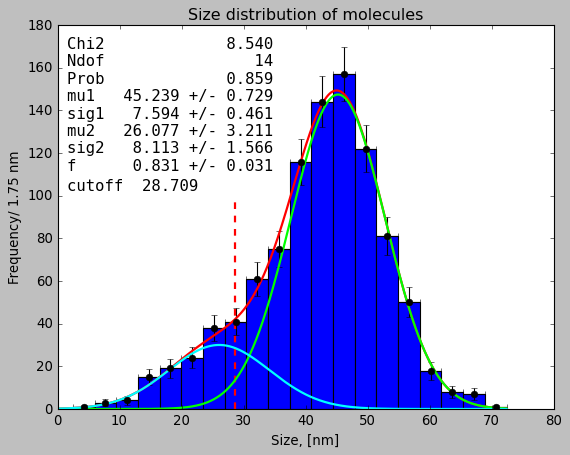

In [29]:
#We need an 90% clean sample of the new smaller molecules
#We sum the smaller gaussian and the total gaussian, and find the 90% point

sum_small = np.cumsum(gauss_fit2)
sum_total = np.cumsum(double_gauss_fit)
relation = sum_small/sum_total
cutoff_index = (relation[:-1]>0.9)* (relation[1:]<0.9)
cutoff = x_fit[:-1][cutoff_index]
print(cutoff, 'nm' )

d = {'cutoff': cutoff[0],
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.6, text, ax, fontsize=14);

ax.vlines(cutoff, 0, 100, color = 'red', linestyle = '--', linewidth = 2)
fig.savefig('4_2_double_gauss_cutoff.png')
fig

In [30]:
#implement the cutoff
size_clean1 = size[size < cutoff]
size_left = size[size >= cutoff]
print(len(size_clean1))

125


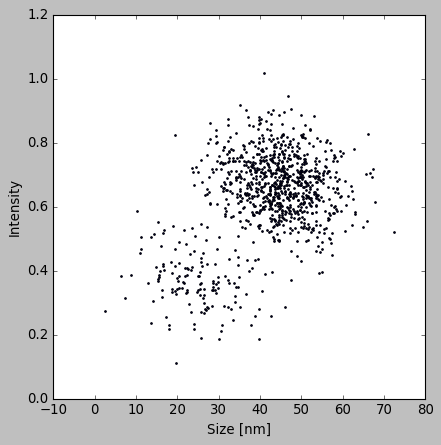

In [31]:
#Scatterplot of size vs intensity
fig2, ax2 = plt.subplots(figsize = (6,6))
ax2.scatter(size, intensity,  s = 2)
ax2.set(xlabel = 'Size [nm]', ylabel = 'Intensity')

fig2.savefig('4_2_scatter.png')

Our method for finding the largest 90% clean sample is to first fit the intensity with a double gauss in order to find the 2 dimensional means of the 2 distributions. From these 2 points we rotate our data and fit with a new double gaussian, which should be optimal. Finding 90% clean sample is done using the same method as before and applying the mask to the original data.

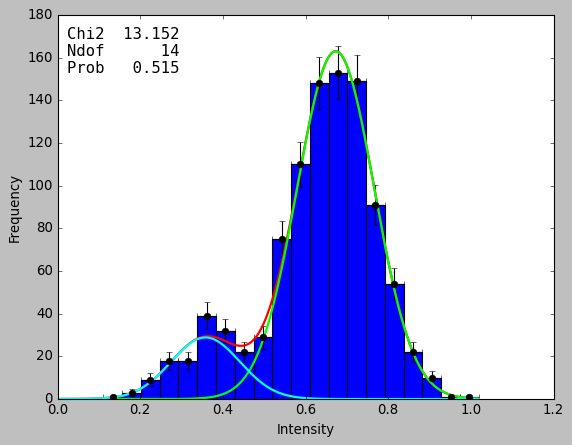

In [32]:
int_count, binedges_int = np.histogram(intensity, bins = 20)
bincenters_int = 0.5*(binedges_int[1:]+binedges_int[:-1])
binwidth_int = (binedges_int[1]-binedges_int[0])/2

#Now fit double gaussian
chi2fit_int = Chi2Regression(double_gaussian, bincenters_int, int_count, np.sqrt(int_count))
minuit_int = Minuit(chi2fit_int, mu1 = 0.7, sig1 = 0.2, mu2 = 0.4, sig2 = 0.2, N = 100, f = 0.5)
minuit_int.migrad()

x_fit_int = np.linspace(0, np.max(binedges_int), 1000)
double_gauss_fit_int = double_gaussian(x_fit_int, *minuit_int.values[:])
gauss_fit1_int = gaussian2(x_fit_int, *minuit_int.values['mu1', 'sig1'], minuit_int.values['N']*(minuit_int.values['f']))
gauss_fit2_int = gaussian2(x_fit_int, *minuit_int.values['mu2', 'sig2'], minuit_int.values['N']*(1-minuit_int.values['f']))

#plot size in histogram
fig_int, ax_int = plt.subplots()
ax_int.hist(intensity, bins = 20)
ax_int.errorbar(bincenters_int, int_count, xerr = binwidth_int, yerr = np.sqrt(int_count), fmt = 'o', color = 'black')
ax_int.plot(x_fit_int, double_gauss_fit_int, color = 'red', linewidth = 2)
ax_int.plot(x_fit_int, gauss_fit1_int, color = 'lime', linewidth = 2)
ax_int.plot(x_fit_int, gauss_fit2_int, color = 'cyan', linewidth = 2)
ax_int.set(xlabel = 'Intensity', ylabel = 'Frequency')

chi2_int = minuit_int.fval
ndof_int = len(int_count) - len(minuit_int.values[:])
chi2_prob_int = stats.chi2.sf(chi2_int, ndof_int)

# Include fit results in the plot:
d_int = {'Chi2': chi2_int,
     'Ndof': ndof_int,
     'Prob': chi2_prob_int,
    }

text_int = nice_string_output(d_int, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text_int, ax_int, fontsize=14);

In [33]:
#Save the 2 means from each double gaussian fit
int_means = np.array([minuit_int.values['mu1'], minuit_int.values['mu2']])
size_means = np.array([minuit.values['mu1'], minuit.values['mu2']])

In [34]:
def lin(x, a, b):
    return a*x+b


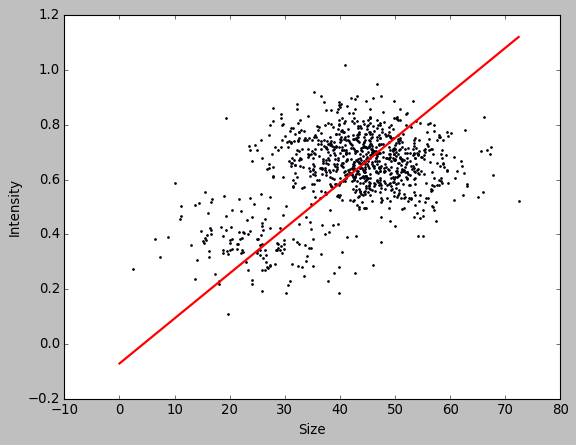

In [35]:
#linear fit through the means
chi2fit_lin = Chi2Regression(lin, size_means, int_means)
minuit_lin = Minuit(chi2fit_lin, a = 1, b = 0)
minuit_lin.migrad()

x_fit_lin = np.linspace(0, np.max(size), 1000)
lin_fit = lin(x_fit_lin, *minuit_lin.values[:])

fig2, ax2 = plt.subplots()
ax2.scatter(size, intensity,  s = 2)
ax2.set(xlabel = 'Size', ylabel = 'Intensity')
ax2.plot(x_fit_lin, lin_fit, color = 'red', linewidth = 2)


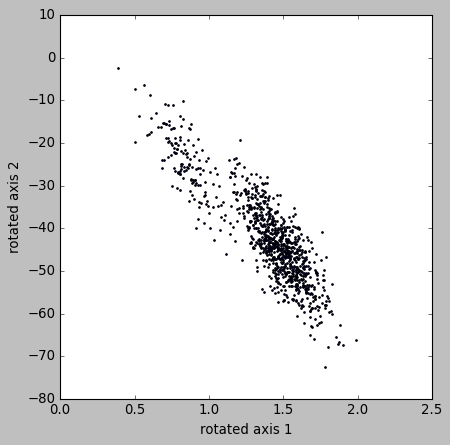

In [36]:
#rotate the data using a rotation matrix
theta = np.arctan(minuit_lin.values['a'])-np.pi/2
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
rotated = np.dot(R, np.array([size, intensity- minuit_lin.values['b']]))

#plot the rotated data
fig3, ax3 = plt.subplots(figsize = (6,6))
ax3.scatter(rotated[0], rotated[1],  s = 2)
ax3.set(xlabel = 'rotated axis 1', ylabel = 'rotated axis 2')
fig3.savefig('4_2_rotated.png')


[1.16647943]


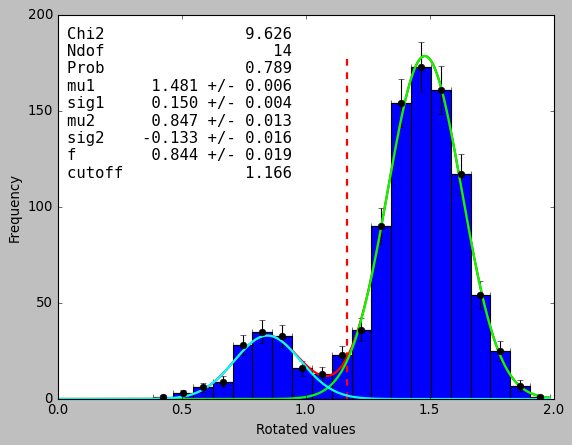

In [37]:
#Fit the rotated data with a double gaussian
count_rot, binedges_rot = np.histogram(rotated[0], bins = 20)
bincenters_rot = 0.5*(binedges_rot[1:]+binedges_rot[:-1])
binwidth_rot = (binedges_rot[1]-binedges_rot[0])/2

chi2fit_rot = Chi2Regression(double_gaussian, bincenters_rot, count_rot, np.sqrt(count_rot))
minuit_rot = Minuit(chi2fit_rot, mu1 = 1.5, sig1 = 0.2, mu2 = 0.7, sig2 = 0.2, N = 100, f = 0.5)
minuit_rot.migrad()

x_fit_rot = np.linspace(0, np.max(binedges_rot), 1000)
double_gauss_fit_rot = double_gaussian(x_fit_rot, *minuit_rot.values[:])
gauss_fit1_rot = gaussian2(x_fit_rot, *minuit_rot.values['mu1', 'sig1'], minuit_rot.values['N']*(minuit_rot.values['f']))
gauss_fit2_rot = gaussian2(x_fit_rot, *minuit_rot.values['mu2', 'sig2'], minuit_rot.values['N']*(1-minuit_rot.values['f']))

#plot size in histogram
fig_rot, ax_rot = plt.subplots()
ax_rot.hist(rotated[0], bins = 20)
ax_rot.errorbar(bincenters_rot, count_rot, xerr = binwidth_rot, yerr = np.sqrt(count_rot), fmt = 'o', color = 'black')
ax_rot.plot(x_fit_rot, double_gauss_fit_rot, color = 'red', linewidth = 2)
ax_rot.plot(x_fit_rot, gauss_fit1_rot, color = 'lime', linewidth = 2)
ax_rot.plot(x_fit_rot, gauss_fit2_rot, color = 'cyan', linewidth = 2)
ax_rot.set(xlabel = 'Rotated values', ylabel = 'Frequency')

chi2_rot = minuit_rot.fval
ndof_rot = len(count_rot) - len(minuit_rot.values[:])
chi2_prob_rot = stats.chi2.sf(chi2_rot, ndof_rot)

sum_small_rot = np.cumsum(gauss_fit2_rot)
sum_total_rot = np.cumsum(double_gauss_fit_rot)
relation_rot = sum_small_rot/sum_total_rot
cutoff_index_rot = (relation_rot[:-1]>0.9)*(relation_rot[1:]<0.9)
cutoff_rot = x_fit_rot[:-1][cutoff_index_rot]
print(cutoff_rot)
mask_final_rot = rotated[0] < cutoff_rot

ax_rot.vlines(cutoff_rot, 0, 180, color = 'red', linestyle = '--', linewidth = 2)

# Include fit results in the plot:
d_rot = {'Chi2': chi2_rot,
        'Ndof': ndof_rot,
        'Prob': chi2_prob_rot,
        'mu1': [minuit_rot.values['mu1'], minuit_rot.errors['mu1']],
        'sig1': [minuit_rot.values['sig1'], minuit_rot.errors['sig1']],
        'mu2': [minuit_rot.values['mu2'], minuit_rot.errors['mu2']],
        'sig2': [minuit_rot.values['sig2'], minuit_rot.errors['sig2']],
        'f': [minuit_rot.values['f'], minuit_rot.errors['f']],     
        'cutoff': cutoff_rot[0]   
    }



text_rot = nice_string_output(d_rot, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text_rot, ax_rot, fontsize=14);


fig_rot.savefig('4_2_rotated_fit.png')

Number of molecules:  157


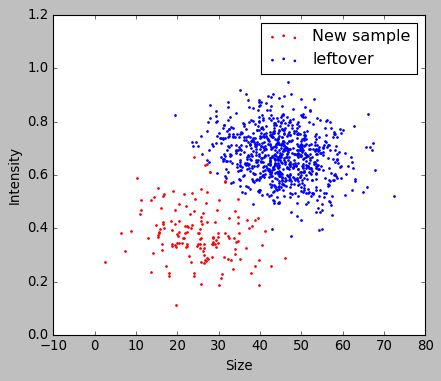

In [38]:
#Plot the original data with the mask in scatter 

fig4, ax4 = plt.subplots(figsize = (6, 5))
ax4.scatter(size[mask_final_rot], intensity[mask_final_rot],  s = 2, color = 'red', label = 'New sample')
ax4.scatter(size[~mask_final_rot], intensity[~mask_final_rot],  s = 2, color = 'blue', label = 'leftover')
ax4.set(xlabel = 'Size', ylabel = 'Intensity')
ax4.legend()
print('Number of molecules: ', len(size[mask_final_rot]))
fig4.savefig('4_2_masked.png')


# 5
### 5.1

In [39]:
algae_data = pd.read_csv('data_AlgaeGrowth.csv', header=0, index_col=None)
time, area, err_area = algae_data.values.T


In [40]:
#Define third degree polynomial
def poly3(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d
    

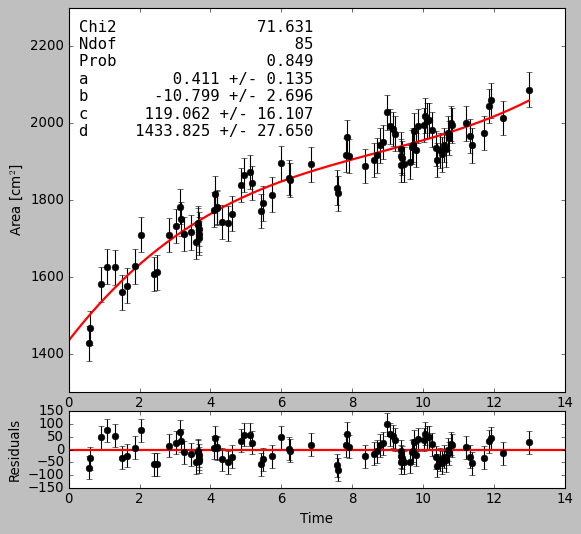

In [41]:
#plot the area as a function of time

fig4, ax4 = plt.subplots()
ax4.errorbar(time, area, yerr = err_area, fmt = 'o', color = 'black')
ax4.set(ylabel = r'Area [cm$^2$]', ylim = (1300, 2300))

#fit the data with a third degree polynomial
chi2fit_poly3 = Chi2Regression(poly3, time, area, err_area)
minuit_poly3 = Minuit(chi2fit_poly3, a = 1, b = 1, c = 1, d = 1)
minuit_poly3.migrad();

x_fit_poly3 = np.linspace(0, np.max(time), 1000)
poly3_fit = poly3(x_fit_poly3, *minuit_poly3.values[:])

ax4.plot(x_fit_poly3, poly3_fit, color = 'red', linewidth = 2)

#add reisduals to the plot
residuals = area - poly3(time, *minuit_poly3.values[:])

ax_res = ax4.inset_axes([0.0, -0.25, 1, 0.2])
ax_res.errorbar(time, residuals, yerr = err_area, fmt = 'o', color = 'black') 
ax_res.set(xlabel = 'Time', ylabel = 'Residuals')
ax_res.axhline(0, color = 'red', linewidth = 2)


chi2_val = minuit_poly3.fval
ndof = len(time) - len(minuit_poly3.values[:])
chi2_prob = stats.chi2.sf(chi2_val, ndof)

# Include fit results in the plot:
d = {'Chi2': chi2_val,
     'Ndof': ndof,
     'Prob': chi2_prob,
        'a': [minuit_poly3.values['a'], minuit_poly3.errors['a']],
        'b': [minuit_poly3.values['b'], minuit_poly3.errors['b']],
        'c': [minuit_poly3.values['c'], minuit_poly3.errors['c']],
        'd': [minuit_poly3.values['d'], minuit_poly3.errors['d']]
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax4, fontsize=14);
fig4.savefig('5_1_1.png', bbox_inches='tight')


The number of runs is 28
The first ten runs are [2, 3, 2, 2, 2, 4, 8, 4, 3, 4]
The expected number of runs is 45.359550561797754
The expected sigma is 4.675139977830141
the distance between the observed and expected number of runs is -3.7131616687667157 sigma
The p-value is 0.0002046860400894462


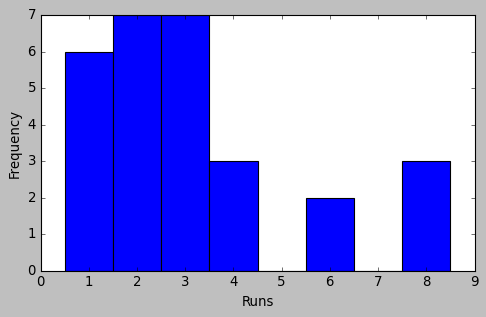

In [42]:
#We perform a runs test on the residuals
runs = []
run = 1
for i in range(len(residuals)-1):
    if residuals[i+1] * residuals[i] > 0:
        run += 1
    else:
        runs.append(run)
        run = 1
runs.append(run)

#Plot the histogram of the runs
fig5, ax5 = plt.subplots(figsize =(7,4))
ax5.hist(runs, bins = np.max(runs), range=(0.5, np.max(runs)+0.5) )
ax5.set(xlabel = 'Runs', ylabel = 'Frequency')

print('The number of runs is', len(runs))
print('The first ten runs are', runs[:10])

number_expected = 1 + 2*(np.sum(residuals > 0)*np.sum(residuals < 0))/(len(residuals))
expected_var = 2*(np.sum(residuals > 0)*np.sum(residuals < 0))*(2*(np.sum(residuals > 0)*np.sum(residuals < 0))- len(residuals))/(len(residuals)**2*(len(residuals)-1))
print('The expected number of runs is', number_expected)
print('The expected sigma is', expected_var**0.5)

print('the distance between the observed and expected number of runs is', (len(runs) - number_expected)/expected_var**0.5, 'sigma')
#find corresponding p-value
p_value = 2*stats.norm.sf(np.abs((len(runs) - number_expected)/expected_var**0.5))
print('The p-value is', p_value)


In [43]:
#We add a small oscillation to the 
def osc(x, Amp, f, phi):
    return Amp*np.sin(f*x + phi)

def poly3_osc(x, a, b, c, d, Amp, f, phi):
    return poly3(x, a, b, c, d) + osc(x, Amp, f, phi)

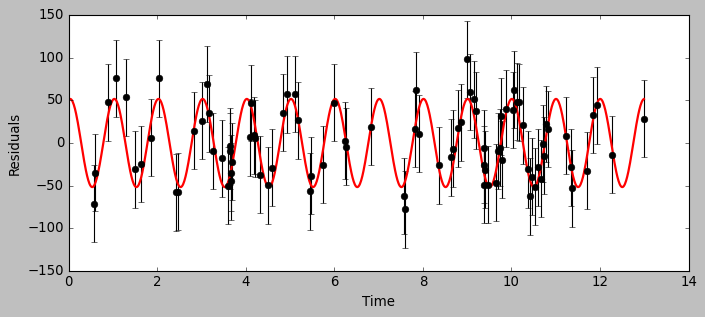

In [44]:
#First a fit of the residuals with a sine function to use as a guess for the fit of the data
chi2fit_osc = Chi2Regression(osc, time, residuals, err_area)
minuit_osc = Minuit(chi2fit_osc, Amp = 100, f = 5, phi = 0)
minuit_osc.migrad();

x_fit_osc = np.linspace(0, np.max(time), 1000)
osc_fit = osc(x_fit_osc, *minuit_osc.values[:])

fig_res, ax_res = plt.subplots(figsize = (10, 4))
ax_res.errorbar(time, residuals, yerr = err_area, fmt = 'o', color = 'black')
ax_res.set(xlabel = 'Time', ylabel = 'Residuals')
ax_res.plot(x_fit_osc, osc_fit, color = 'red', linewidth = 2)


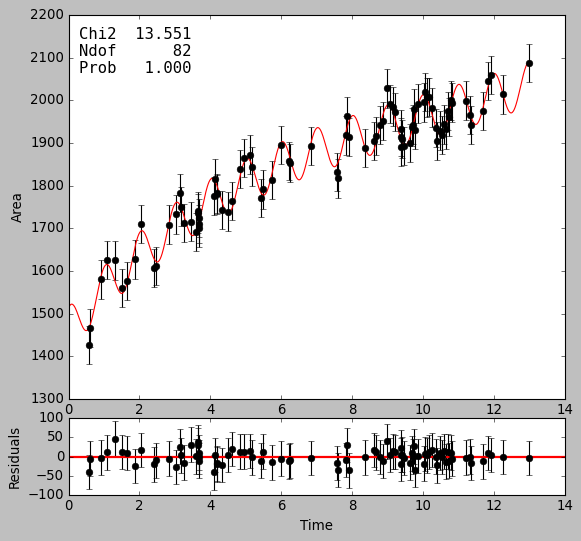

In [45]:
#fit the data with a third degree polynomial and an oscillation
chi2fit_poly3_osc = Chi2Regression(poly3_osc, time, area, err_area)
minuit_poly3_osc = Minuit(chi2fit_poly3_osc, a = 1, b = 1, c = 1, d = 1, Amp = minuit_osc.values['Amp'], f = minuit_osc.values['f'], phi = minuit_osc.values['phi'])
minuit_poly3_osc.migrad();

x_fit_poly3_osc = np.linspace(0, np.max(time), 1000)
poly3_osc_fit = poly3_osc(x_fit_poly3_osc, *minuit_poly3_osc.values[:])

fig4, ax4 = plt.subplots()
ax4.errorbar(time, area, yerr = err_area, fmt = 'o', color = 'black')
ax4.set(ylabel = 'Area')

ax4.plot(x_fit_poly3_osc, poly3_osc_fit, color = 'red', linewidth = 1)

#add reisduals to the plot
residuals_osc = area - poly3_osc(time, *minuit_poly3_osc.values[:])

ax_res_osc = ax4.inset_axes([0.0, -0.25, 1, 0.2])
ax_res_osc.errorbar(time, residuals_osc, yerr = err_area, fmt = 'o', color = 'black')
ax_res_osc.set(xlabel = 'Time', ylabel = 'Residuals')
ax_res_osc.axhline(0, color = 'red', linewidth = 2)


chi2_val = minuit_poly3_osc.fval
ndof = len(time) - len(minuit_poly3_osc.values[:])
chi2_prob = stats.chi2.sf(chi2_val, ndof)

# Include fit results in the plot:
d = {'Chi2': chi2_val,
     'Ndof': ndof,
     'Prob': chi2_prob,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax4, fontsize=14);

fig4.savefig('5_1_2.png', bbox_inches='tight')


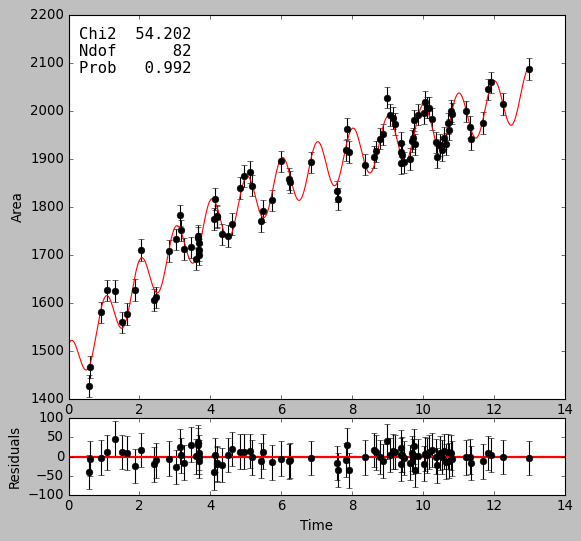

In [46]:
#Same as before but with half the error
chi2fit_poly3_osc = Chi2Regression(poly3_osc, time, area, err_area/2)
minuit_poly3_osc = Minuit(chi2fit_poly3_osc, a = 1, b = 1, c = 1, d = 1, Amp = minuit_osc.values['Amp'], f = minuit_osc.values['f'], phi = minuit_osc.values['phi'])
minuit_poly3_osc.migrad();

x_fit_poly3_osc = np.linspace(0, np.max(time), 1000)
poly3_osc_fit = poly3_osc(x_fit_poly3_osc, *minuit_poly3_osc.values[:])

fig4, ax4 = plt.subplots()
ax4.errorbar(time, area, yerr = err_area/2, fmt = 'o', color = 'black')
ax4.set(ylabel = 'Area')

ax4.plot(x_fit_poly3_osc, poly3_osc_fit, color = 'red', linewidth = 1)

#add reisduals to the plot
residuals_osc = area - poly3_osc(time, *minuit_poly3_osc.values[:])

ax_res_osc = ax4.inset_axes([0.0, -0.25, 1, 0.2])
ax_res_osc.errorbar(time, residuals_osc, yerr = err_area, fmt = 'o', color = 'black')
ax_res_osc.set(xlabel = 'Time', ylabel = 'Residuals')
ax_res_osc.axhline(0, color = 'red', linewidth = 2)


chi2_val = minuit_poly3_osc.fval
ndof = len(time) - len(minuit_poly3_osc.values[:])
chi2_prob = stats.chi2.sf(chi2_val, ndof)

# Include fit results in the plot:
d = {'Chi2': chi2_val,
     'Ndof': ndof,
     'Prob': chi2_prob,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax4, fontsize=14);

fig4.savefig('5_1_2_half_err.png', bbox_inches='tight')


The number of runs is 45
The first ten runs are [3, 4, 1, 1, 4, 2, 1, 4, 2, 1]
the distance between the observed and expected number of runs is -0.07690690834986097 sigma
The p-value is 0.9386976017584996


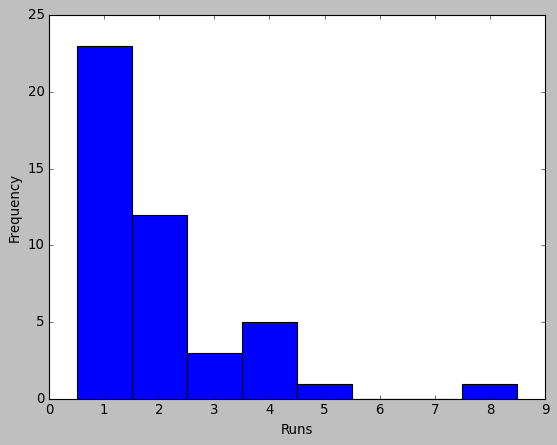

In [47]:
#We perform a runs test on the residuals
runs_osc = []
run_osc = 1
for i in range(len(residuals_osc)-1):
    if residuals_osc[i+1] * residuals_osc[i] > 0:
        run_osc += 1
    else:
        runs_osc.append(run_osc)
        run_osc = 1
runs_osc.append(run_osc)

#Plot the histogram of the runs
fig5, ax5 = plt.subplots()
ax5.hist(runs_osc, bins = np.max(runs_osc), range=(0.5, np.max(runs_osc)+0.5) )
ax5.set(xlabel = 'Runs', ylabel = 'Frequency')

print('The number of runs is', len(runs_osc))
print('The first ten runs are', runs_osc[:10])

#We perform a runs test on the residuals
print('the distance between the observed and expected number of runs is', (len(runs_osc) - number_expected)/expected_var**0.5, 'sigma')
#find corresponding p-value
p_value = 2*stats.norm.sf(np.abs((len(runs_osc) - number_expected)/expected_var**0.5))
print('The p-value is', p_value)

In [48]:
#5.2

Bohr_data = pd.read_csv('data_BohrHypothesis.csv', header=0, index_col=None)
wavel, voltage = Bohr_data.values.T

In [49]:
#Define gaussian function with linear background
def gauss_lin(x, a, b, c, d, e):
    return  a*binwidth*stats.norm.pdf(x, b, c) + d*x + e


c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2086: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2087: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


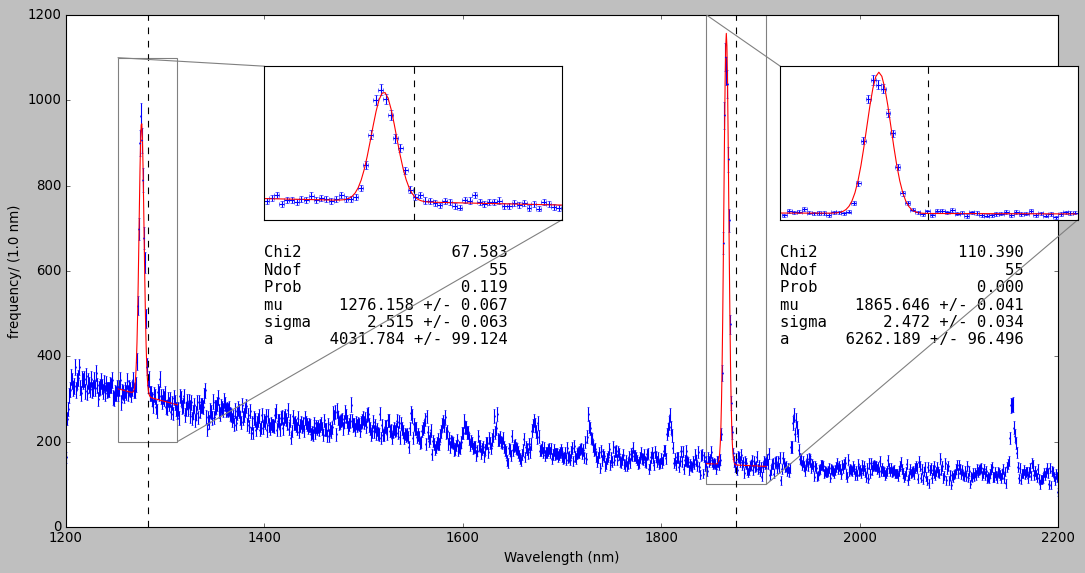

In [50]:
N_bins = 1000
counts, binedges = np.histogram(wavel, bins = N_bins, range = (1200, 2200))
bincenters = 0.5*(binedges[1:] + binedges[:-1])
binwidth = binedges[1] - binedges[0]

fig, ax = plt.subplots( figsize = (16, 8) )
ax.errorbar(bincenters, counts, yerr = np.sqrt(counts), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 1)
ax.set(xlabel = 'Wavelength (nm)', ylabel = f'frequency/ ({binwidth:.1f} nm)')

width = 30
#slice the data for the first peak around 1282.174 nm
lambd1 = 1282.174
ax.axvline(lambd1, color = 'black', linestyle = '--')
mask1 = (bincenters > lambd1 - width)*(bincenters < lambd1 + width)
counts1 = counts[mask1]
bincenters1 = bincenters[mask1]

#Fit the first peak 
chi2_1 = Chi2Regression(gauss_lin, bincenters1, counts1, np.sqrt(counts1))
minuit_1 = Minuit(chi2_1, a = 3000, b = lambd1, c = 1, d = -5, e = 500)
minuit_1.migrad();

x_1 = np.linspace(lambd1 - width, lambd1 + width, 100)
y_1 = gauss_lin(x_1, *minuit_1.values[:])

ax1 = ax.inset_axes([0.2, 0.6, 0.3, 0.3])
mark_inset(ax, ax1, loc1=2, loc2=4, fc="none", ec="0.5")
ax1.errorbar(bincenters1, counts1, yerr = np.sqrt(counts1), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 2)
ax1.plot(x_1, y_1, color = 'red', linewidth = 1)
ax.plot(x_1, y_1, color = 'red', linewidth = 1)
ax1.set(ylim = (200, 1100))
ax1.set_xticks([])
ax1.set_yticks([])
ax1.axvline(lambd1, color = 'black', linestyle = '--')

chi2_val1 = minuit_1.fval
ndof1 = len(bincenters1) - len(minuit_1.values[:])
chi2_prob1 = stats.chi2.sf(chi2_val1, ndof1)


d1 = {'Chi2': chi2_val1,
     'Ndof': ndof1,
     'Prob': chi2_prob1,
     'mu': [minuit_1.values['b'], minuit_1.errors['b']],
    'sigma': [minuit_1.values['c'], minuit_1.errors['c']],
    'a': [minuit_1.values['a'], minuit_1.errors['a']],
    }

text1 = nice_string_output(d1, extra_spacing=2, decimals=3)
add_text_to_ax(0.2, 0.55, text1, ax, fontsize=14);

#slice the data for the second peak around 1875.637 nm
lambd2 = 1875.637
ax.axvline(lambd2, color = 'black', linestyle = '--')

mask2 = (bincenters > lambd2 - width)*(bincenters < lambd2 + width)
counts2 = counts[mask2]
bincenters2 = bincenters[mask2]

#Fit the second peak
chi2_2 = Chi2Regression(gauss_lin, bincenters2, counts2, np.sqrt(counts2))
minuit_2 = Minuit(chi2_2, a = 3000, b = lambd2, c = 2, d = -5, e = 50)
minuit_2.migrad();

x_2 = np.linspace(lambd2 - width, lambd2 + width, 100)
y_2 = gauss_lin(x_2, *minuit_2.values[:])

ax2 = ax.inset_axes([0.72, 0.6, 0.3, 0.3])
mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec="0.5")
ax2.errorbar(bincenters2, counts2, yerr = np.sqrt(counts2), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 2)
ax2.plot(x_2, y_2, color = 'red', linewidth = 1)
ax.plot(x_2, y_2, color = 'red', linewidth = 1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set(ylim = (100, 1200));
ax2.axvline(lambd2, color = 'black', linestyle = '--')

chi2_val2 = minuit_2.fval
ndof2 = len(bincenters2) - len(minuit_2.values[:])
chi2_prob2 = stats.chi2.sf(chi2_val2, ndof2)


d2 = {'Chi2': chi2_val2,
     'Ndof': ndof2,
     'Prob': chi2_prob2,
    'mu':  [minuit_2.values['b'], minuit_2.errors['b']],
    'sigma': [minuit_2.values['c'], minuit_2.errors['c']],
    'a': [minuit_2.values['a'], minuit_2.errors['a']],
    }

text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.72, 0.55, text2, ax, fontsize=14);

fig.savefig('5_2_uncallibrated.png')

In [51]:
#check for consistent sigma
print('The sigma of the first peak is', minuit_1.values['c'], '+-', minuit_1.errors['c'], 'wide')
print('The sigma of the second peak is', minuit_2.values['c'], '+-', minuit_2.errors['c'], 'wide')
z = (minuit_1.values['c'] - minuit_2.values['c'])/np.sqrt(minuit_1.errors['c']**2 + minuit_2.errors['c']**2)
print('The z-value is', z)
print('The probability is', 2*stats.norm.sf(abs(z)))



The sigma of the first peak is 2.5154732504417856 +- 0.06322207259118319 wide
The sigma of the second peak is 2.4721394620064165 +- 0.033990881937527695 wide
The z-value is 0.6037003527750496
The probability is 0.5460428795545418


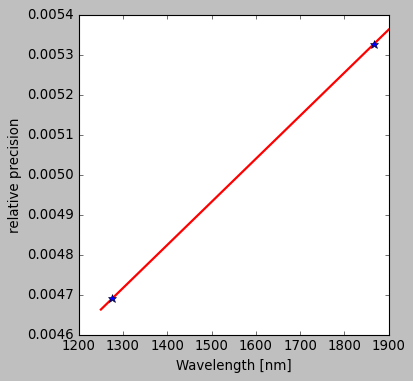

In [52]:
#Calibration of the wavelength using linear regression of the two peaks
x = np.array([minuit_1.values['b'], minuit_2.values['b']])
y = (np.array([lambd1, lambd2]) - x)/np.array([lambd1, lambd2])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

fig, ax = plt.subplots( figsize = (5, 5))
x_fit = np.linspace(1250, 1900, 2)
ax.plot(x_fit, intercept + slope*x_fit, color = 'red', linewidth = 2)
ax.plot(x, y, '*', ms = 8)
ax.set(xlabel = 'Wavelength [nm]', ylabel = 'relative precision')


fig.savefig('5_2_calibration.png')

c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2086: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2087: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


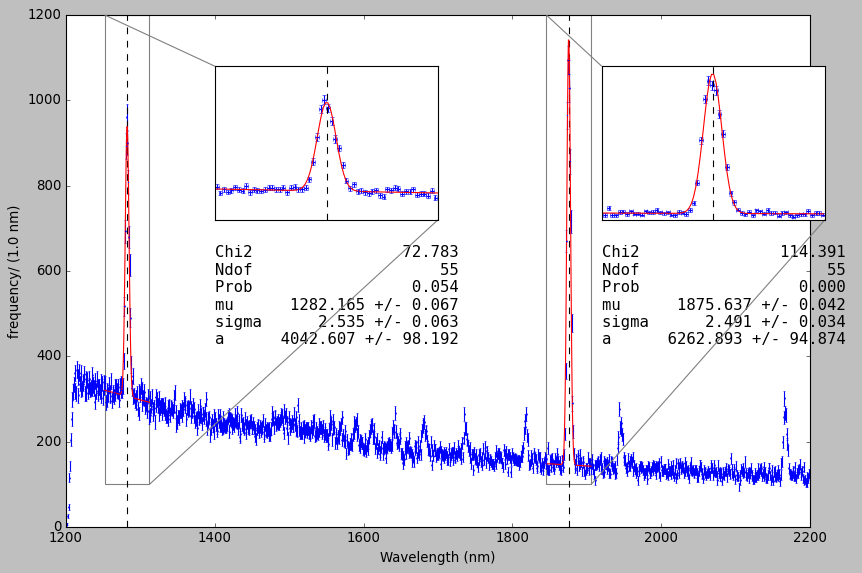

In [53]:
wavel_new = wavel/(1 - lin(wavel, slope, intercept))

counts, binedges = np.histogram(wavel_new, bins = N_bins, range = (1200, 2200))
bincenters = 0.5*(binedges[1:] + binedges[:-1])
binwidth = binedges[1] - binedges[0]

fig, ax = plt.subplots(figsize = (12, 8))
ax.errorbar(bincenters, counts, yerr = np.sqrt(counts), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 1)
ax.set(xlabel = 'Wavelength (nm)', ylabel = f'frequency/ ({binwidth:.1f} nm)')

width = 30
#slice the data for the first peak around 1282.174 nm
lambd1 = 1282.174
ax.axvline(lambd1, color = 'black', linestyle = '--')
mask1 = (bincenters > lambd1 - width)*(bincenters < lambd1 + width)
counts1 = counts[mask1]
bincenters1 = bincenters[mask1]

#Fit the first peak 
chi2_1 = Chi2Regression(gauss_lin, bincenters1, counts1, np.sqrt(counts1))
minuit_1 = Minuit(chi2_1, a = 3000, b = lambd1, c = 3, d = -5, e = 500)
minuit_1.migrad();

x_1 = np.linspace(lambd1 - width, lambd1 + width, 100)
y_1 = gauss_lin(x_1, *minuit_1.values[:])

ax1 = ax.inset_axes([0.2, 0.6, 0.3, 0.3])
mark_inset(ax, ax1, loc1=2, loc2=4, fc="none", ec="0.5")
ax1.errorbar(bincenters1, counts1, yerr = np.sqrt(counts1), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 2)
ax1.plot(x_1, y_1, color = 'red', linewidth = 1)
ax.plot(x_1, y_1, color = 'red', linewidth = 1)
ax1.set(ylim = (100, 1200))
ax1.set_xticks([])
ax1.set_yticks([])
ax1.axvline(lambd1, color = 'black', linestyle = '--')

chi2_val1 = minuit_1.fval
ndof1 = len(bincenters1) - len(minuit_1.values[:])
chi2_prob1 = stats.chi2.sf(chi2_val1, ndof1)


d1 = {'Chi2': chi2_val1,
     'Ndof': ndof1,
     'Prob': chi2_prob1,
     'mu': [minuit_1.values['b'], minuit_1.errors['b']],
    'sigma': [minuit_1.values['c'], minuit_1.errors['c']],
    'a': [minuit_1.values['a'], minuit_1.errors['a']],
    }

text1 = nice_string_output(d1, extra_spacing=2, decimals=3)
add_text_to_ax(0.2, 0.55, text1, ax, fontsize=14);

#slice the data for the second peak around 1875.637 nm
lambd2 = 1875.637
mask2 = (bincenters > lambd2 - width)*(bincenters < lambd2 + width)
counts2 = counts[mask2]
bincenters2 = bincenters[mask2]
ax.axvline(lambd2, color = 'black', linestyle = '--')

#Fit the second peak
chi2_2 = Chi2Regression(gauss_lin, bincenters2, counts2, np.sqrt(counts2))
minuit_2 = Minuit(chi2_2, a = 3000, b = lambd2, c = 2.3, d = -1, e = 100)
minuit_2.migrad();

x_2 = np.linspace(lambd2 - width, lambd2 + width, 100)
y_2 = gauss_lin(x_2, *minuit_2.values[:])

ax2 = ax.inset_axes([0.72, 0.6, 0.3, 0.3])
mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec="0.5")
ax2.errorbar(bincenters2, counts2, yerr = np.sqrt(counts2), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 2)
ax2.plot(x_2, y_2, color = 'red', linewidth = 1)
ax.plot(x_2, y_2, color = 'red', linewidth = 1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set(ylim = (100, 1200));
ax2.axvline(lambd2, color = 'black', linestyle = '--')

chi2_val2 = minuit_2.fval
ndof2 = len(bincenters2) - len(minuit_2.values[:])
chi2_prob2 = stats.chi2.sf(chi2_val2, ndof2)


d2 = {'Chi2': chi2_val2,
     'Ndof': ndof2,
     'Prob': chi2_prob2,
    'mu':  [minuit_2.values['b'], minuit_2.errors['b']],
    'sigma': [minuit_2.values['c'], minuit_2.errors['c']],
    'a': [minuit_2.values['a'], minuit_2.errors['a']],
    }

text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.72, 0.55, text2, ax, fontsize=14);

fig.savefig('5_2_calibrated.png', bbox_inches = 'tight')


Jagten på peaks

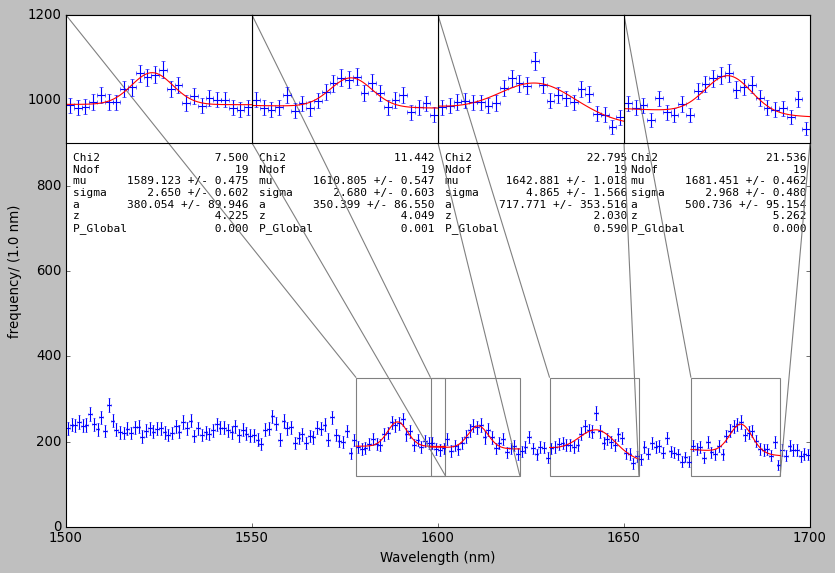

In [54]:
guesses = np.array([1680, 1642, 1610, 1590])

mask15_17 = (bincenters > 1500)*(bincenters < 1700)
counts15_17 = counts[mask15_17]
bincenters15_17 = bincenters[mask15_17]

#plot the bins 
fig, ax = plt.subplots(figsize = (12, 8))
ax.errorbar(bincenters15_17, counts15_17, yerr = np.sqrt(counts15_17), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 1)
ax.set(xlabel = 'Wavelength (nm)', ylabel = f'frequency/ ({binwidth:.1f} nm)')
ax.set(ylim = (0, 1200), xlim = (1500, 1700))


width1 = 12


locations = np.array([0.75, 0.5, 0.25, 0])

minuits = []

for guess, loc in zip(guesses, locations):
    mask = (bincenters > guess - width1)*(bincenters < guess + width1)
    counts1 = counts[mask]
    bincenters1 = bincenters[mask]

    chi2_1 = Chi2Regression(gauss_lin, bincenters1, counts1, np.sqrt(counts1))
    minuit_1 = Minuit(chi2_1, a = 800, b = guess, c = 2, d = -1, e = 100)
    minuit_1.migrad();

    x_1 = np.linspace(guess - width1, guess + width1, 100)
    y_1 = gauss_lin(x_1, *minuit_1.values[:])

    ax1 = ax.inset_axes([loc, 0.75, 0.25, 0.25])
    mark_inset(ax, ax1, loc1=2, loc2=4, fc="none", ec="0.5")
    ax1.errorbar(bincenters1, counts1, yerr = np.sqrt(counts1), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 2)
    ax1.plot(x_1, y_1, color = 'red', linewidth = 1)
    ax.plot(x_1, y_1, color = 'red', linewidth = 1)
    ax1.set(ylim = (120, 350))
    ax1.set_xticks([])
    ax1.set_yticks([])

    chi2_val1 = minuit_1.fval
    ndof1 = len(bincenters1) - len(minuit_1.values[:])
    chi2_prob1 = stats.norm.sf(minuit_1.values['a']/minuit_1.errors['a'])
    prob_global = 1-(1-chi2_prob1)**((binedges[-1]-binedges[0])/(2*width1))


    d1 = {'Chi2': chi2_val1,
        'Ndof': ndof1,
        'mu': [minuit_1.values['b'], minuit_1.errors['b']],
        'sigma': [minuit_1.values['c'], minuit_1.errors['c']],
        'a': [minuit_1.values['a'], minuit_1.errors['a']],
        'z ': minuit_1.values['a']/minuit_1.errors['a'], 
        'P_Global': prob_global,
        }

    text1 = nice_string_output(d1, extra_spacing=0, decimals=3)
    add_text_to_ax(loc+0.01, 0.73, text1, ax, fontsize=10);


fig.savefig('5_2_15_17.png', bbox_inches = 'tight')


c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2086: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2087: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


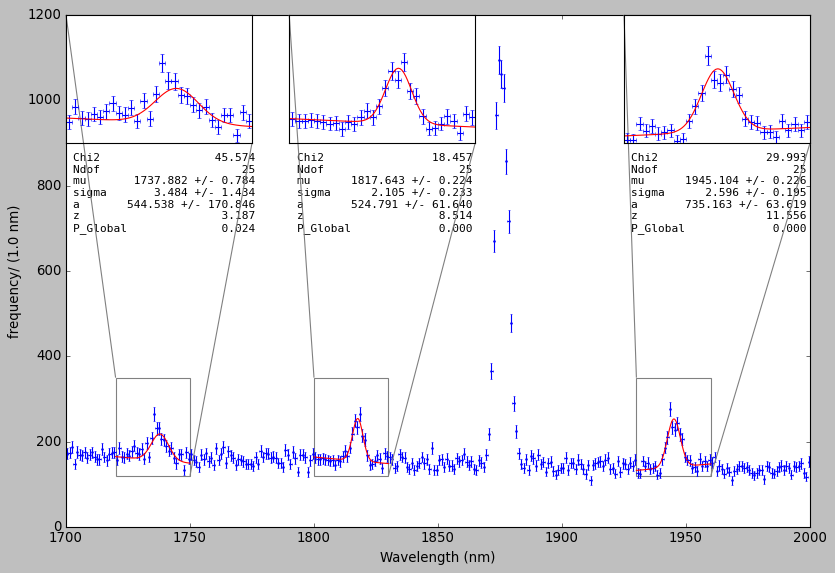

In [55]:
mask17_20 = (bincenters > 1700)*(bincenters < 2000)
counts17_20 = counts[mask17_20]
bincenters17_20 = bincenters[mask17_20]

#plot the bins 
fig, ax = plt.subplots(figsize = (12, 8))
ax.errorbar(bincenters17_20, counts17_20, yerr = np.sqrt(counts17_20), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 1)
ax.set(xlabel = 'Wavelength (nm)', ylabel = f'frequency/ ({binwidth:.1f} nm)')
ax.set(ylim = (0, 1200), xlim = (1700, 2000))


width1 = 15

guesses = np.array([1945, 1815, 1735])
locations = np.array([0.75, 0.30, 0])


for guess, loc in zip(guesses, locations):
    mask = (bincenters > guess - width1)*(bincenters < guess + width1)
    counts1 = counts[mask]
    bincenters1 = bincenters[mask]

    chi2_1 = Chi2Regression(gauss_lin, bincenters1, counts1, np.sqrt(counts1))
    minuit_1 = Minuit(chi2_1, a = 800, b = guess, c = 2, d = -1, e = 100)
    minuit_1.migrad();

    x_1 = np.linspace(guess - width1, guess + width1, 100)
    y_1 = gauss_lin(x_1, *minuit_1.values[:])

    ax1 = ax.inset_axes([loc, 0.75, 0.25, 0.25])
    mark_inset(ax, ax1, loc1=2, loc2=4, fc="none", ec="0.5")
    ax1.errorbar(bincenters1, counts1, yerr = np.sqrt(counts1), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 2)
    ax1.plot(x_1, y_1, color = 'red', linewidth = 1)
    ax.plot(x_1, y_1, color = 'red', linewidth = 1)
    ax1.set(ylim = (120, 350))
    ax1.set_xticks([])
    ax1.set_yticks([])

    chi2_val1 = minuit_1.fval
    ndof1 = len(bincenters1) - len(minuit_1.values[:])
    chi2_prob1 = stats.norm.sf(minuit_1.values['a']/minuit_1.errors['a'])
    prob_global = 1-(1-chi2_prob1)**((binedges[-1]-binedges[0])/(2*width1))


    d1 = {'Chi2': chi2_val1,
        'Ndof': ndof1,
        'mu': [minuit_1.values['b'], minuit_1.errors['b']],
        'sigma': [minuit_1.values['c'], minuit_1.errors['c']],
        'a': [minuit_1.values['a'], minuit_1.errors['a']],
        'z ': minuit_1.values['a']/minuit_1.errors['a'], 
        'P_Global': prob_global,
        }

    text1 = nice_string_output(d1, extra_spacing=0, decimals=3)
    add_text_to_ax(loc+0.01, 0.73, text1, ax, fontsize=10);

fig.savefig('5_2_17_20.png', bbox_inches = 'tight')


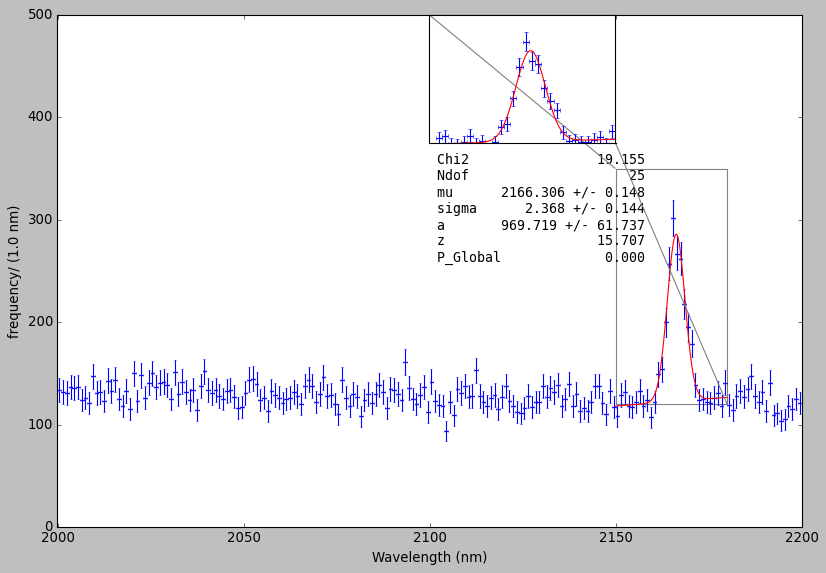

In [56]:
mask20_22 = (bincenters > 2000)*(bincenters < 2200)
counts20_22 = counts[mask20_22]
bincenters20_22 = bincenters[mask20_22]

#plot the bins
fig, ax = plt.subplots(figsize = (12, 8))
ax.errorbar(bincenters20_22, counts20_22, yerr = np.sqrt(counts20_22), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 1)
ax.set(xlabel = 'Wavelength (nm)', ylabel = f'frequency/ ({binwidth:.1f} nm)')
ax.set(ylim = (0, 500), xlim = (2000, 2200))



guesses = np.array([2165])
locations = np.array([0.50])

for guess, loc in zip(guesses, locations):
    mask = (bincenters > guess - width1)*(bincenters < guess + width1)
    counts1 = counts[mask]
    bincenters1 = bincenters[mask]

    chi2_1 = Chi2Regression(gauss_lin, bincenters1, counts1, np.sqrt(counts1))
    minuit_1 = Minuit(chi2_1, a = 800, b = guess, c = 2, d = -1, e = 100)
    minuit_1.migrad();

    x_1 = np.linspace(guess - width1, guess + width1, 100)
    y_1 = gauss_lin(x_1, *minuit_1.values[:])

    ax1 = ax.inset_axes([loc, 0.75, 0.25, 0.25])
    mark_inset(ax, ax1, loc1=2, loc2=4, fc="none", ec="0.5")
    ax1.errorbar(bincenters1, counts1, yerr = np.sqrt(counts1), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 2)
    ax1.plot(x_1, y_1, color = 'red', linewidth = 1)
    ax.plot(x_1, y_1, color = 'red', linewidth = 1)
    ax1.set(ylim = (120, 350))
    ax1.set_xticks([])
    ax1.set_yticks([])

    chi2_val1 = minuit_1.fval
    ndof1 = len(bincenters1) - len(minuit_1.values[:])
    chi2_prob1 = stats.norm.sf(minuit_1.values['a']/minuit_1.errors['a'])
    prob_global = 1-(1-chi2_prob1)**((binedges[-1]-binedges[0])/(2*width1))


    
    d1 = {'Chi2': chi2_val1,
        'Ndof': ndof1,
        'mu': [minuit_1.values['b'], minuit_1.errors['b']],
        'sigma': [minuit_1.values['c'], minuit_1.errors['c']],
        'a': [minuit_1.values['a'], minuit_1.errors['a']],
        'z ': minuit_1.values['a']/minuit_1.errors['a'], 
        'P_Global': prob_global,
        }

    text1 = nice_string_output(d1, extra_spacing=0, decimals=3)
    add_text_to_ax(loc+0.01, 0.73, text1, ax, fontsize=12);

fig.savefig('5_2_20_22.png', bbox_inches = 'tight')


c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2086: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2087: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)
c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2086: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2087: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


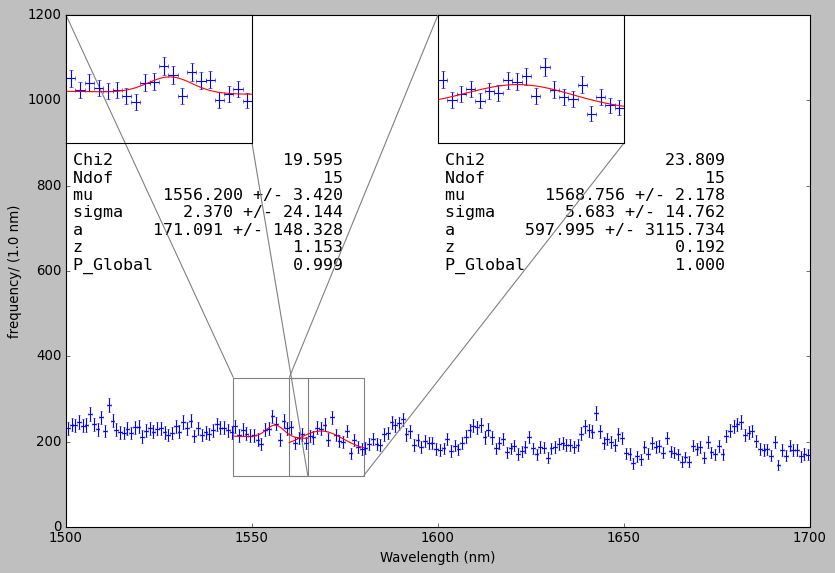

In [57]:
#The last few possible peaks
#plot the bins 
fig, ax = plt.subplots(figsize = (12, 8))
ax.errorbar(bincenters15_17, counts15_17, yerr = np.sqrt(counts15_17), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 1)
ax.set(xlabel = 'Wavelength (nm)', ylabel = f'frequency/ ({binwidth:.1f} nm)')
ax.set(ylim = (0, 1200), xlim = (1500, 1700))


width1 = 10

guesses = np.array([1570, 1555])
locations = np.array([0.50, 0])


for guess, loc in zip(guesses, locations):
    mask = (bincenters > guess - width1)*(bincenters < guess + width1)
    counts1 = counts[mask]
    bincenters1 = bincenters[mask]

    chi2_1 = Chi2Regression(gauss_lin, bincenters1, counts1, np.sqrt(counts1))
    minuit_1 = Minuit(chi2_1, a = 900, b = guess, c = 2, d = -0.5, e = 200)
    minuit_1.migrad();

    x_1 = np.linspace(guess - width1, guess + width1, 100)
    y_1 = gauss_lin(x_1, *minuit_1.values[:])

    ax1 = ax.inset_axes([loc, 0.75, 0.25, 0.25])
    mark_inset(ax, ax1, loc1=2, loc2=4, fc="none", ec="0.5")
    ax1.errorbar(bincenters1, counts1, yerr = np.sqrt(counts1), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 2)
    ax1.plot(x_1, y_1, color = 'red', linewidth = 1)
    ax.plot(x_1, y_1, color = 'red', linewidth = 1)
    ax1.set(ylim = (120, 350))
    ax1.set_xticks([])
    ax1.set_yticks([])

    chi2_val1 = minuit_1.fval
    ndof1 = len(bincenters1) - len(minuit_1.values[:])
    chi2_prob1 = stats.norm.sf(minuit_1.values['a']/minuit_1.errors['a'])
    prob_global = 1-(1-chi2_prob1)**((binedges[-1]-binedges[0])/(2*width1))


    
    d1 = {'Chi2': chi2_val1,
        'Ndof': ndof1,
        'mu': [minuit_1.values['b'], minuit_1.errors['b']],
        'sigma': [minuit_1.values['c'], minuit_1.errors['c']],
        'a': [minuit_1.values['a'], minuit_1.errors['a']],
        'z ': minuit_1.values['a']/minuit_1.errors['a'], 
        'P_Global': prob_global,
        }

    text1 = nice_string_output(d1, extra_spacing=0, decimals=3)
    add_text_to_ax(loc+0.01, 0.73, text1, ax, fontsize=15);


fig.savefig('5_2_nonsig.png', bbox_inches = 'tight')

In [58]:
R = 1.09677e7 

#Calculate the bracket series spectrum
def spec(n_1 , n_2):
    return (R*(1/n_1**2 - 1/n_2**2))**(-1)

print(spec(7, 4))



-2.1661401896091025e-06


In [59]:
def profile_x(x, y, bins=(50, 50), xyrange=[(0, 50), (-1,1)]):
    
    H, xedges, yedges = np.histogram2d(x, y, bins=bins, range=xyrange)
    x_center = 0.5*(xedges[1:] + xedges[:-1])
    y_center = 0.5*(yedges[1:] + yedges[:-1])
    
    wsums = H.sum(1)
    
    mask = wsums > 0
    
    mean = (H*y_center).sum(1)[mask] / wsums[mask]
    mean_squared = (H*y_center**2).sum(1)[mask] / wsums[mask]
    std = np.sqrt( mean_squared - mean**2 ) / np.sqrt(wsums[mask]) 

    return x_center[mask], mean, std

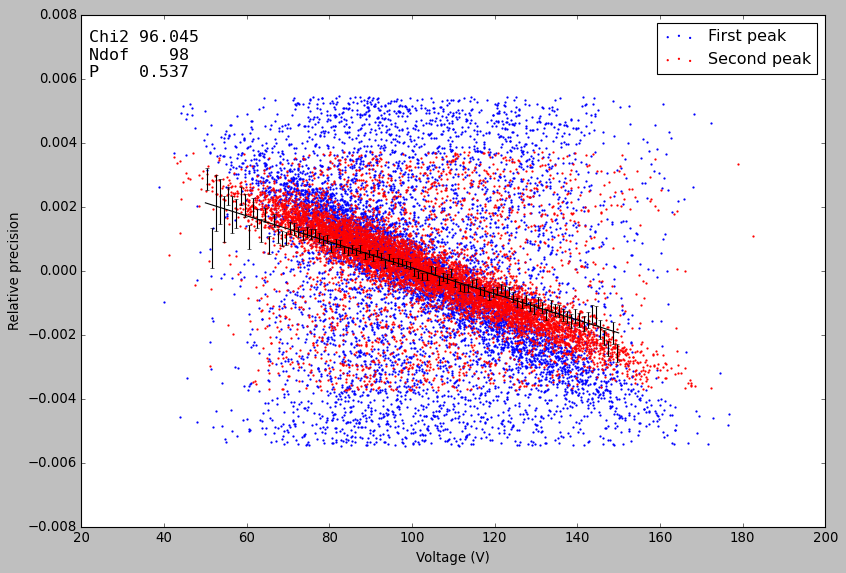

In [60]:
#Calibration according to voltage and the two large peaks

width = 7
#Measurements around first peak
mask1 = (wavel_new > lambd1 - width)*(wavel_new < lambd1 + width)
#wavelengths around first peak
wavel1 = wavel_new[mask1]
voltage1 = voltage[mask1]
rel_precision1 = (lambd1 - wavel1)/lambd1


#Measurements around second peak
mask2 = (wavel_new > lambd2 - width)*(wavel_new < lambd2 + width)
#wavelengths around second peak
wavel2 = wavel_new[mask2]
voltage2 = voltage[mask2]
rel_precision2 = (lambd2 - wavel2)/lambd2


#Plot density plot of the relative precision as a function of voltage
fig, ax = plt.subplots(figsize = (12, 8))
ax.set(xlabel = 'Voltage (V)', ylabel = 'Relative precision')
#ax.set(ylim = (-0.0005, 0.0005))
ax.scatter(voltage1, rel_precision1, s = 1, label = 'First peak', color = 'blue')
ax.scatter(voltage2, rel_precision2, s = 1, label = 'Second peak', color = 'red')
ax.legend()


#linear fit all of the data
def lin(x, a, b):
    return a*x + b

#combine the arrays
voltages = np.concatenate((voltage1, voltage2))
rel_precision = np.concatenate((rel_precision1, rel_precision2))

x, y , yerr = profile_x(voltages, rel_precision, bins = (100, 100), xyrange = [(50, 150), (-0.01, 0.01)])

ax.errorbar(x, y, yerr = yerr, fmt = '.', ms = 1, capsize = 2, color = 'black')


chi2_lin = Chi2Regression(lin, x, y, yerr)
minuit_lin = Minuit(chi2_lin, a = -0.00001, b = 0)
minuit_lin.migrad();

x_lin = np.linspace(50, 150, 100)
y_lin = lin(x_lin, *minuit_lin.values[:])

ax.plot(x_lin, y_lin, color = 'black', linewidth = 1)

d = {'Chi2': minuit_lin.fval,
    'Ndof': len(x) - len(minuit_lin.values[:]),
    'P': stats.chi2.sf(minuit_lin.fval, len(x) - len(minuit_lin.values[:])),
    }

text = nice_string_output(d, extra_spacing=0, decimals=3)
add_text_to_ax(0.01, 0.97, text, ax, fontsize=15);


fig.savefig('5_2_voltage.png', bbox_inches = 'tight')

c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2086: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2087: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


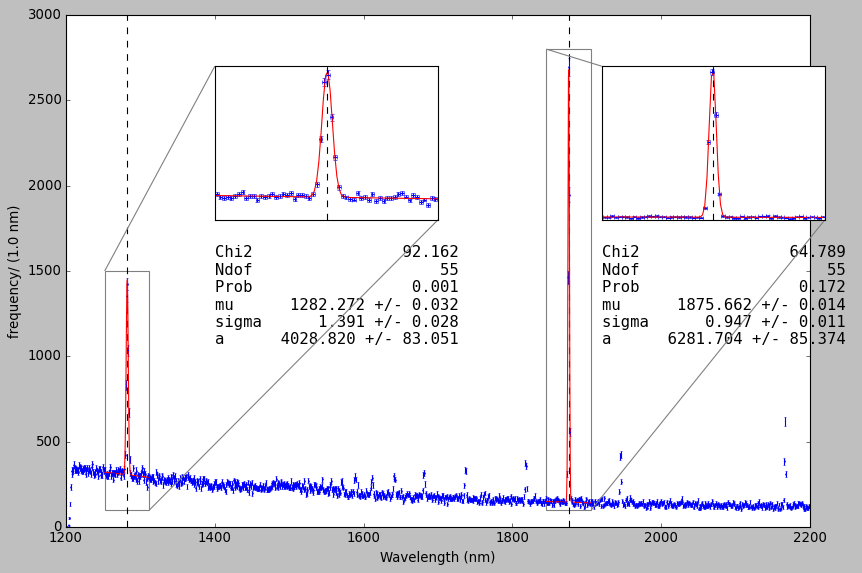

In [61]:
wavel_final = wavel_new/(1 - lin(voltage, *minuit_lin.values[:]))

counts, binedges = np.histogram(wavel_final, bins = N_bins, range = (1200, 2200))
bincenters = 0.5*(binedges[1:] + binedges[:-1])
binwidth = binedges[1] - binedges[0]

fig, ax = plt.subplots(figsize = (12, 8))
ax.errorbar(bincenters, counts, yerr = np.sqrt(counts), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 1)
ax.set(xlabel = 'Wavelength (nm)', ylabel = f'frequency/ ({binwidth:.1f} nm)')

width = 30
#slice the data for the first peak around 1282.174 nm
lambd1 = 1282.174
ax.axvline(lambd1, color = 'black', linestyle = '--')
mask1 = (bincenters > lambd1 - width)*(bincenters < lambd1 + width)
counts1 = counts[mask1]
bincenters1 = bincenters[mask1]

#Fit the first peak 
chi2_1 = Chi2Regression(gauss_lin, bincenters1, counts1, np.sqrt(counts1))
minuit_1 = Minuit(chi2_1, a = 3000, b = lambd1, c = 3, d = -5, e = 500)
minuit_1.migrad();

x_1 = np.linspace(lambd1 - width, lambd1 + width, 100)
y_1 = gauss_lin(x_1, *minuit_1.values[:])

ax1 = ax.inset_axes([0.2, 0.6, 0.3, 0.3])
mark_inset(ax, ax1, loc1=2, loc2=4, fc="none", ec="0.5")
ax1.errorbar(bincenters1, counts1, yerr = np.sqrt(counts1), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 2)
ax1.plot(x_1, y_1, color = 'red', linewidth = 1)
ax.plot(x_1, y_1, color = 'red', linewidth = 1)
ax1.set(ylim = (100, 1500))
ax1.set_xticks([])
ax1.set_yticks([])
ax1.axvline(lambd1, color = 'black', linestyle = '--')

chi2_val1 = minuit_1.fval
ndof1 = len(bincenters1) - len(minuit_1.values[:])
chi2_prob1 = stats.chi2.sf(chi2_val1, ndof1)


d1 = {'Chi2': chi2_val1,
     'Ndof': ndof1,
     'Prob': chi2_prob1,
     'mu': [minuit_1.values['b'], minuit_1.errors['b']],
    'sigma': [minuit_1.values['c'], minuit_1.errors['c']],
    'a': [minuit_1.values['a'], minuit_1.errors['a']],
    }

text1 = nice_string_output(d1, extra_spacing=2, decimals=3)
add_text_to_ax(0.2, 0.55, text1, ax, fontsize=14);

#slice the data for the second peak around 1875.637 nm
lambd2 = 1875.637
mask2 = (bincenters > lambd2 - width)*(bincenters < lambd2 + width)
counts2 = counts[mask2]
bincenters2 = bincenters[mask2]
ax.axvline(lambd2, color = 'black', linestyle = '--')

#Fit the second peak
chi2_2 = Chi2Regression(gauss_lin, bincenters2, counts2, np.sqrt(counts2))
minuit_2 = Minuit(chi2_2, a = 3000, b = lambd2, c = 2.3, d = -1, e = 100)
minuit_2.migrad();

x_2 = np.linspace(lambd2 - width, lambd2 + width, 100)
y_2 = gauss_lin(x_2, *minuit_2.values[:])

ax2 = ax.inset_axes([0.72, 0.6, 0.3, 0.3])
mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec="0.5")
ax2.errorbar(bincenters2, counts2, yerr = np.sqrt(counts2), xerr = binwidth/2, fmt ='.', ms = 1, capsize= 2)
ax2.plot(x_2, y_2, color = 'red', linewidth = 1)
ax.plot(x_2, y_2, color = 'red', linewidth = 1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set(ylim = (100, 2800));
ax2.axvline(lambd2, color = 'black', linestyle = '--')

chi2_val2 = minuit_2.fval
ndof2 = len(bincenters2) - len(minuit_2.values[:])
chi2_prob2 = stats.chi2.sf(chi2_val2, ndof2)


d2 = {'Chi2': chi2_val2,
     'Ndof': ndof2,
     'Prob': chi2_prob2,
    'mu':  [minuit_2.values['b'], minuit_2.errors['b']],
    'sigma': [minuit_2.values['c'], minuit_2.errors['c']],
    'a': [minuit_2.values['a'], minuit_2.errors['a']],
    }

text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.72, 0.55, text2, ax, fontsize=14);

fig.savefig('5_2_final.png', bbox_inches = 'tight')